In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

# Parameters
Two,Ttrain = 2000,50000
N = 50
C = 0.95
maxdim = 100
dims = torch.arange(1, maxdim + 1)
totMCs = []
totMC_N =[]

torch.manual_seed(0)
fn = "mcs_res_csvd.txt"
f = open(fn,"w")
for dim in dims:
    print( f"\r{int(dim)}/{maxdim} dimensions : calculating ...",end = "")
    N_d = int(N * dim)
    #N_d = N
    maxtau = int(N_d / dim * 1.7)
    u_asym = torch.rand(dim, Two + Ttrain)
    u_sym = 2 * u_asym - 1

    esn = ESN.ESN_mult(N_d, uC=C, dim=dim)
    Xwo = esn.run_washout(u_sym, Two, actf="identity")
    #mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
    mfs = ESN.MC_cSVD(u_sym, Xwo, maxtau,sur_sets=1)
    
    mc = torch.sum(mfs).cpu().numpy()
    totMCs.append(mc)
    totMC_N.append((mc/int(N_d)))
    f.write(str(mc))

#np.savetxt(fn,totMCs,"w")
print(totMCs)
print(totMC_N)

100/100 dimensions : calculating ...[array(49.90858374), array(99.40558404), array(149.37944859), array(199.21772379), array(248.60807013), array(298.46205506), array(347.96829305), array(398.02444909), array(447.61163397), array(496.76477709), array(547.13280134), array(597.71950959), array(646.09077981), array(695.72755347), array(746.04399642), array(795.06063822), array(844.92005913), array(894.96006188), array(945.29164223), array(995.42260393), array(1044.32391766), array(1094.58274459), array(1144.28605466), array(1193.85231813), array(1244.42062964), array(1293.18009136), array(1342.87484345), array(1393.19392375), array(1442.92000136), array(1494.03589243), array(1542.3963479), array(1593.0717672), array(1642.49595574), array(1691.55553688), array(1740.97177588), array(1791.31894855), array(1841.4680247), array(1891.53717087), array(1940.68938704), array(1991.28577898), array(2040.60447301), array(2090.17554784), array(2141.62868279), array(2190.85534965), array(2239.34966958)

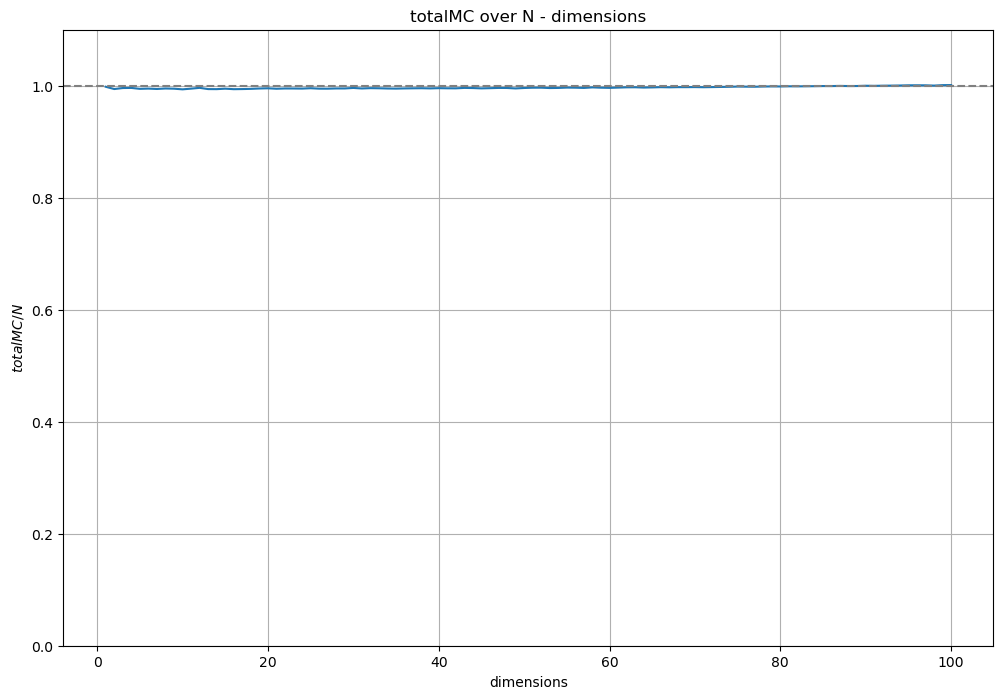

In [2]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(1,len(totMC_N)+1),totMC_N, marker = "o")
plt.ylim(0,1.1)
plt.axhline(y=1, color='grey', linestyle='--')
#plt.xticks(dims)
plt.xlabel("dimensions")
plt.ylabel(r'$totalMC / N$')
plt.title('totalMC over N - dimensions')
plt.grid(True)

In [3]:
f.close()